In [2]:
from google.colab import drive
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [30]:
#Import df

data_file = "https://raw.githubusercontent.com/ApollocreedXI/MESA-8410-Final-Project/refs/heads/main/admin_long_cleaned_Q4.csv"

admin_long_df = pd.read_csv(data_file, parse_dates=[2])

#Research question 3

##Can the distinction in average FIR by women and other variables be utilized to distinguish if a station has a woman controlling the WHD?


In [31]:
admin_long_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0.1            4500 non-null   int64         
 1   Unnamed: 0              4500 non-null   int64         
 2   month                   4500 non-null   datetime64[ns]
 3   fir_overall_count       4500 non-null   int64         
 4   fir_caw_count           4500 non-null   int64         
 5   fir_bywomen_count       4500 non-null   int64         
 6   arrest_count            4500 non-null   int64         
 7   dir_count               4500 non-null   int64         
 8   ncr_count               4500 non-null   int64         
 9   ps_code                 4500 non-null   float64       
 10  urban                   4500 non-null   object        
 11  dist_urban              4500 non-null   float64       
 12  treatment               4500 non-null   object  

In [32]:
#drop unnecessary variables
admin_long_df = admin_long_df.drop(columns = ["Unnamed: 0", "Unnamed: 0.1","year_YYYY","month_MM"])

In [33]:
#Making dataframe only containing the treatment groups

treatment_groups = admin_long_df[admin_long_df["treatment_encoded"] == 1 ]

In [34]:
#Renaming columns

treatment_groups = treatment_groups.rename(columns={'arrest_count': 'Average Arrests', 'fir_bywomen_count': "Average FIR Filed By Women", "fir_caw_count": "Average FIR Filed in CAW Cases", "month":"Month","women_whd": "Women WHD" })


#Version 1 of the Infographic

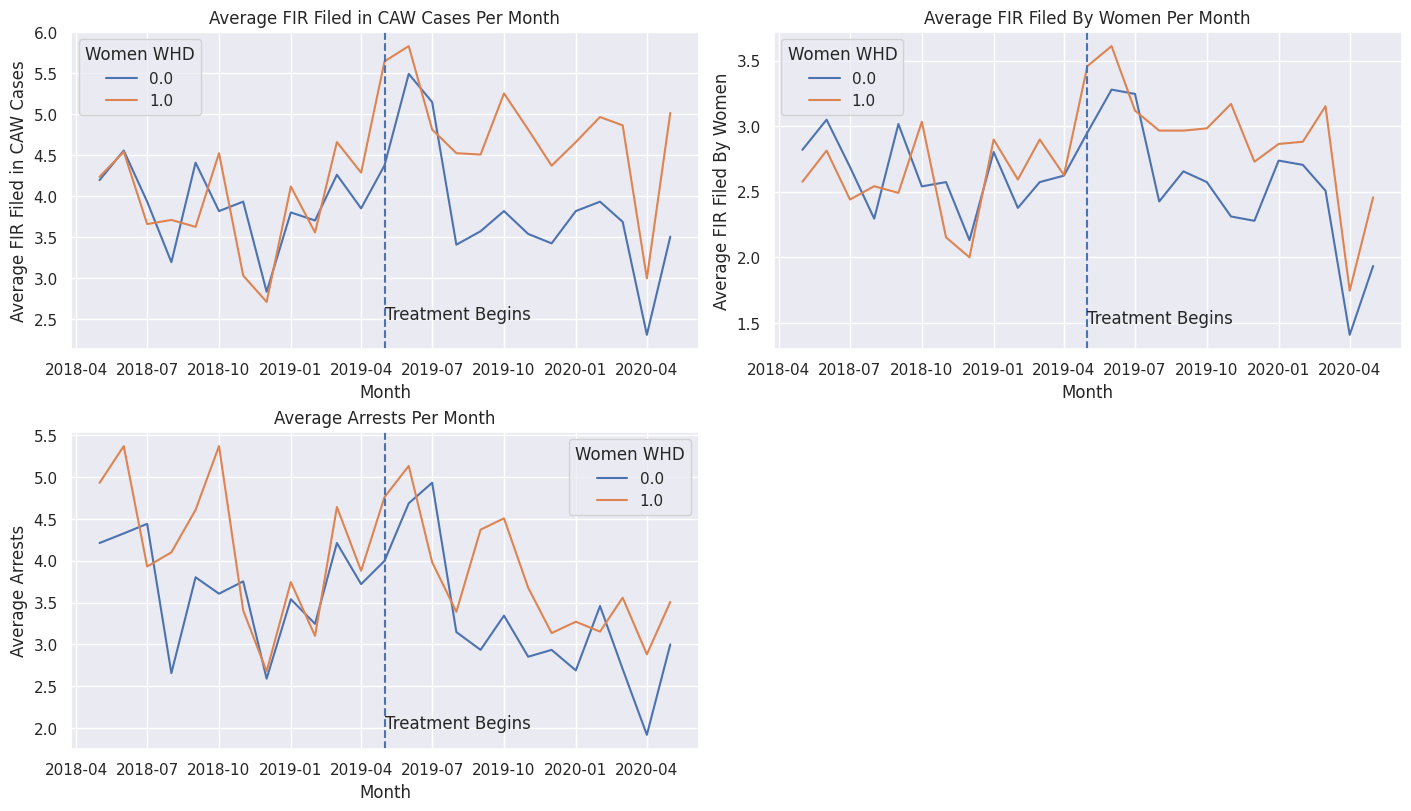

In [38]:


# Only included necessary variables
y_columns = ['Average FIR Filed in CAW Cases','Average FIR Filed By Women', 'Average Arrests']

# Setting up the grid
n_cols = 2  # Number of columns in the grid
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 8), constrained_layout=True)

# Flatten axes array
axes = axes.flatten()

# Creating Lineplots with hue for 'Women WHD'
for i, col in enumerate(y_columns):
    sns.lineplot(data = treatment_groups, x='Month', y=col, hue='Women WHD', ax=axes[i], errorbar = None)
    axes[i].set_title(f'{col} Per Month')
    axes[i].axvline(pd.to_datetime('2019-05'), linestyle='--')



#Adding text for each subplot
axes[0].text(pd.to_datetime('2019-05-01'), 2.5,"Treatment Begins")
axes[1].text(pd.to_datetime('2019-05-01'), 1.5,"Treatment Begins")
axes[2].text(pd.to_datetime('2019-05-01'), 2.0,"Treatment Begins")



# Hide any empty subplots if columns are less than grid cells
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.show()

###This graph illustrates that prior to treatment police station averages for FIR filed in CAW & FIR filed by women were almost indistinguishable. However, once treatment was implemented we saw a sharp rise in both graphs immediately. The top two graphs shows the women-controlled WHD had elevated averages above pretreatment averages. Regular WHD started to return to pretreatment trends. Looking at the average arrests we can see that the implementation of the WHD does not necessarily lead to higher average arrest over time.

#Version 2 of the Visual

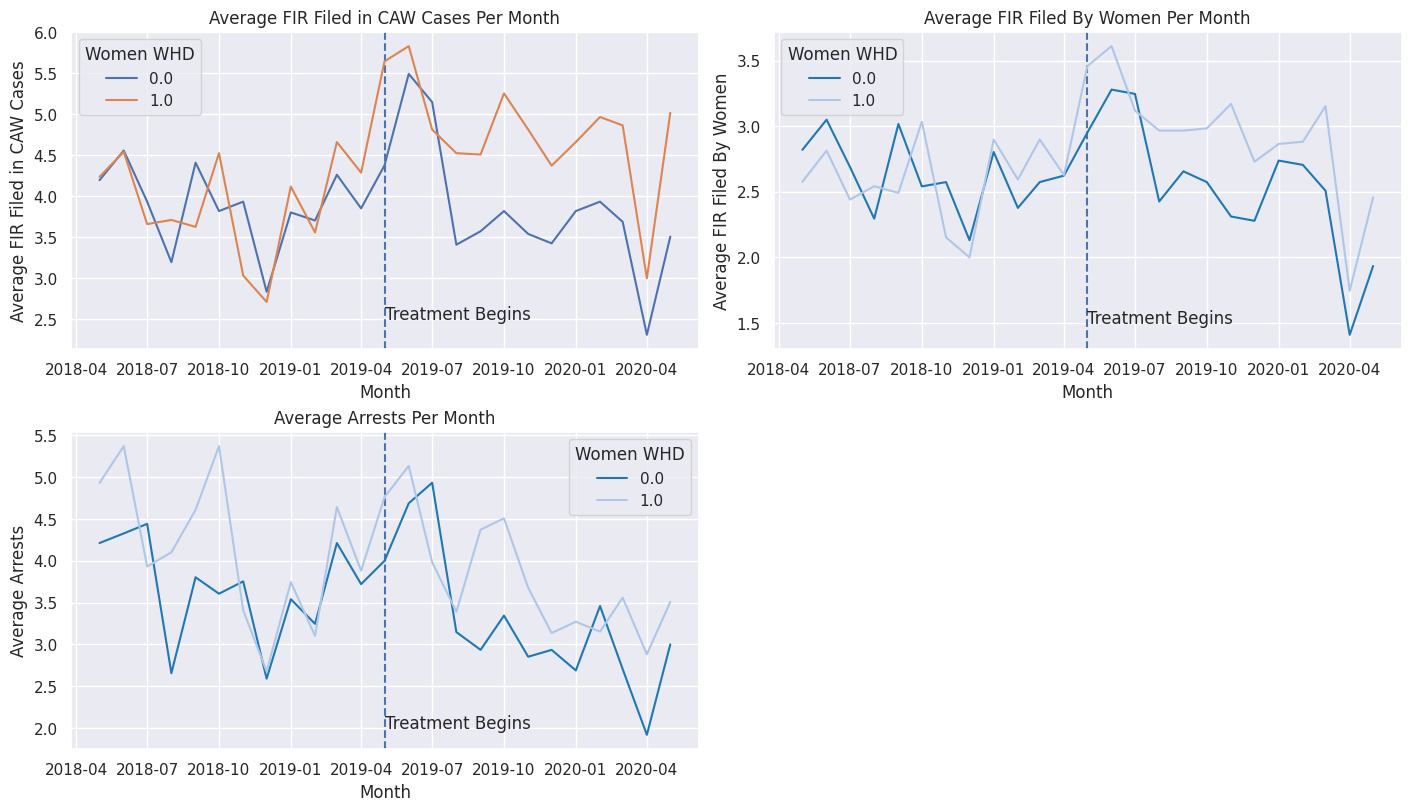

In [39]:
# Only included necessary variables
y_columns = ['Average FIR Filed in CAW Cases','Average FIR Filed By Women', 'Average Arrests']

# Setting up the grid
n_cols = 2  # Number of columns in the grid
n_rows = (len(y_columns) + n_cols - 1) // n_cols  # Calculate rows needed based on total columns

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 8), constrained_layout=True)

# Flatten axes array
axes = axes.flatten()

# Creating vertical lines and titles for each subplot
for i, col in enumerate(y_columns):
    axes[i].set_title(f'{col} Per Month')
    axes[i].axvline(pd.to_datetime('2019-05'), linestyle='--')

#Creating lineplots with different color schemes
sns.lineplot(data = treatment_groups, x='Month', y=y_columns[0], hue='Women WHD', ax=axes[0], errorbar = None)
sns.lineplot(data = treatment_groups, x='Month', y=y_columns[1], hue='Women WHD', palette='tab20',  ax=axes[1], errorbar = None)
sns.lineplot(data = treatment_groups, x='Month', y=y_columns[2], hue='Women WHD', palette='tab20', ax=axes[2], errorbar = None)

#Adding text for each subplot
axes[0].text(pd.to_datetime('2019-05-01'), 2.50,"Treatment Begins")
axes[1].text(pd.to_datetime('2019-05-01'), 1.50,"Treatment Begins")
axes[2].text(pd.to_datetime('2019-05-01'), 2.00,"Treatment Begins")



# Hide any empty subplots if columns are less than grid cells
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.show()

### This is a second version of my graph. I decided to neutralize the other graphs to highlight the first graph, as the treatment effect in averages is more pronounced.

#Research Question 1.
## Does implementation of WHS influence awareness of police inadequacies?

In [20]:
#import df

data_file = "/content/drive/My Drive/Colab Notebooks/MPP Science Replication Package/Data/"

police_survey_df = pd.read_csv(data_file + "police_survey_cleaned_Q1.csv")

In [21]:
#Earlier in the data preprocessing I say some of the categorical variable were not spelled correctly. Will fix this
old_cat = ["very effective", "effective", "neither effective nor ineffective", "very ineffective", "ineffecive"]
new_cat = ["Very Effective", "Effective", "Neither Effective Nor Ineffective", "Very Ineffective", "Ineffective"]



for x in range(0,5):
    police_survey_df = police_survey_df.replace(old_cat[x],new_cat[x])

#police_survey_df.replace("very effective","Very Effective")


In [22]:
police_survey_df.head()

,Unnamed: 0,uid,gender,e_wcase,e_effective,e_sensitivity,treatment,regular_whd,women_whd,b_uid,b_wcase,b_effective,b_sensitivity,e_wcase_encoded,b_wcase_encoded,e_effective_encoded,b_effective_encoded
0,0,2141733,male,too much attention,Very Effective,8.0,Treatment,0.0,1.0,2141762,enough attention,Very Effective,8.0,2.0,1.0,4.0,4.0
1,1,2141734,male,too much attention,Effective,9.0,Treatment,0.0,1.0,2141764,too much attention,Very Effective,8.0,2.0,2.0,3.0,4.0
2,2,2141739,male,too much attention,Very Effective,7.0,Treatment,0.0,1.0,2141765,enough attention,Effective,5.0,2.0,1.0,4.0,3.0
3,3,2141742,male,too much attention,Very Effective,5.0,Treatment,0.0,1.0,2141766,too much attention,Very Effective,8.0,2.0,2.0,4.0,4.0
4,4,2141740,male,enough attention,Effective,7.0,Treatment,0.0,1.0,2141767,too much attention,Very Effective,6.0,1.0,2.0,3.0,4.0


In [23]:
#Lets look as endline effectiveness for the different treatment groups
#As there are two different treatment groups it might be good to separate these out

#Creating new data frame for regular and Women_whd
whd_df = police_survey_df[(police_survey_df["regular_whd"] != 1)]

regular_df = police_survey_df[(police_survey_df["women_whd"] != 1)]


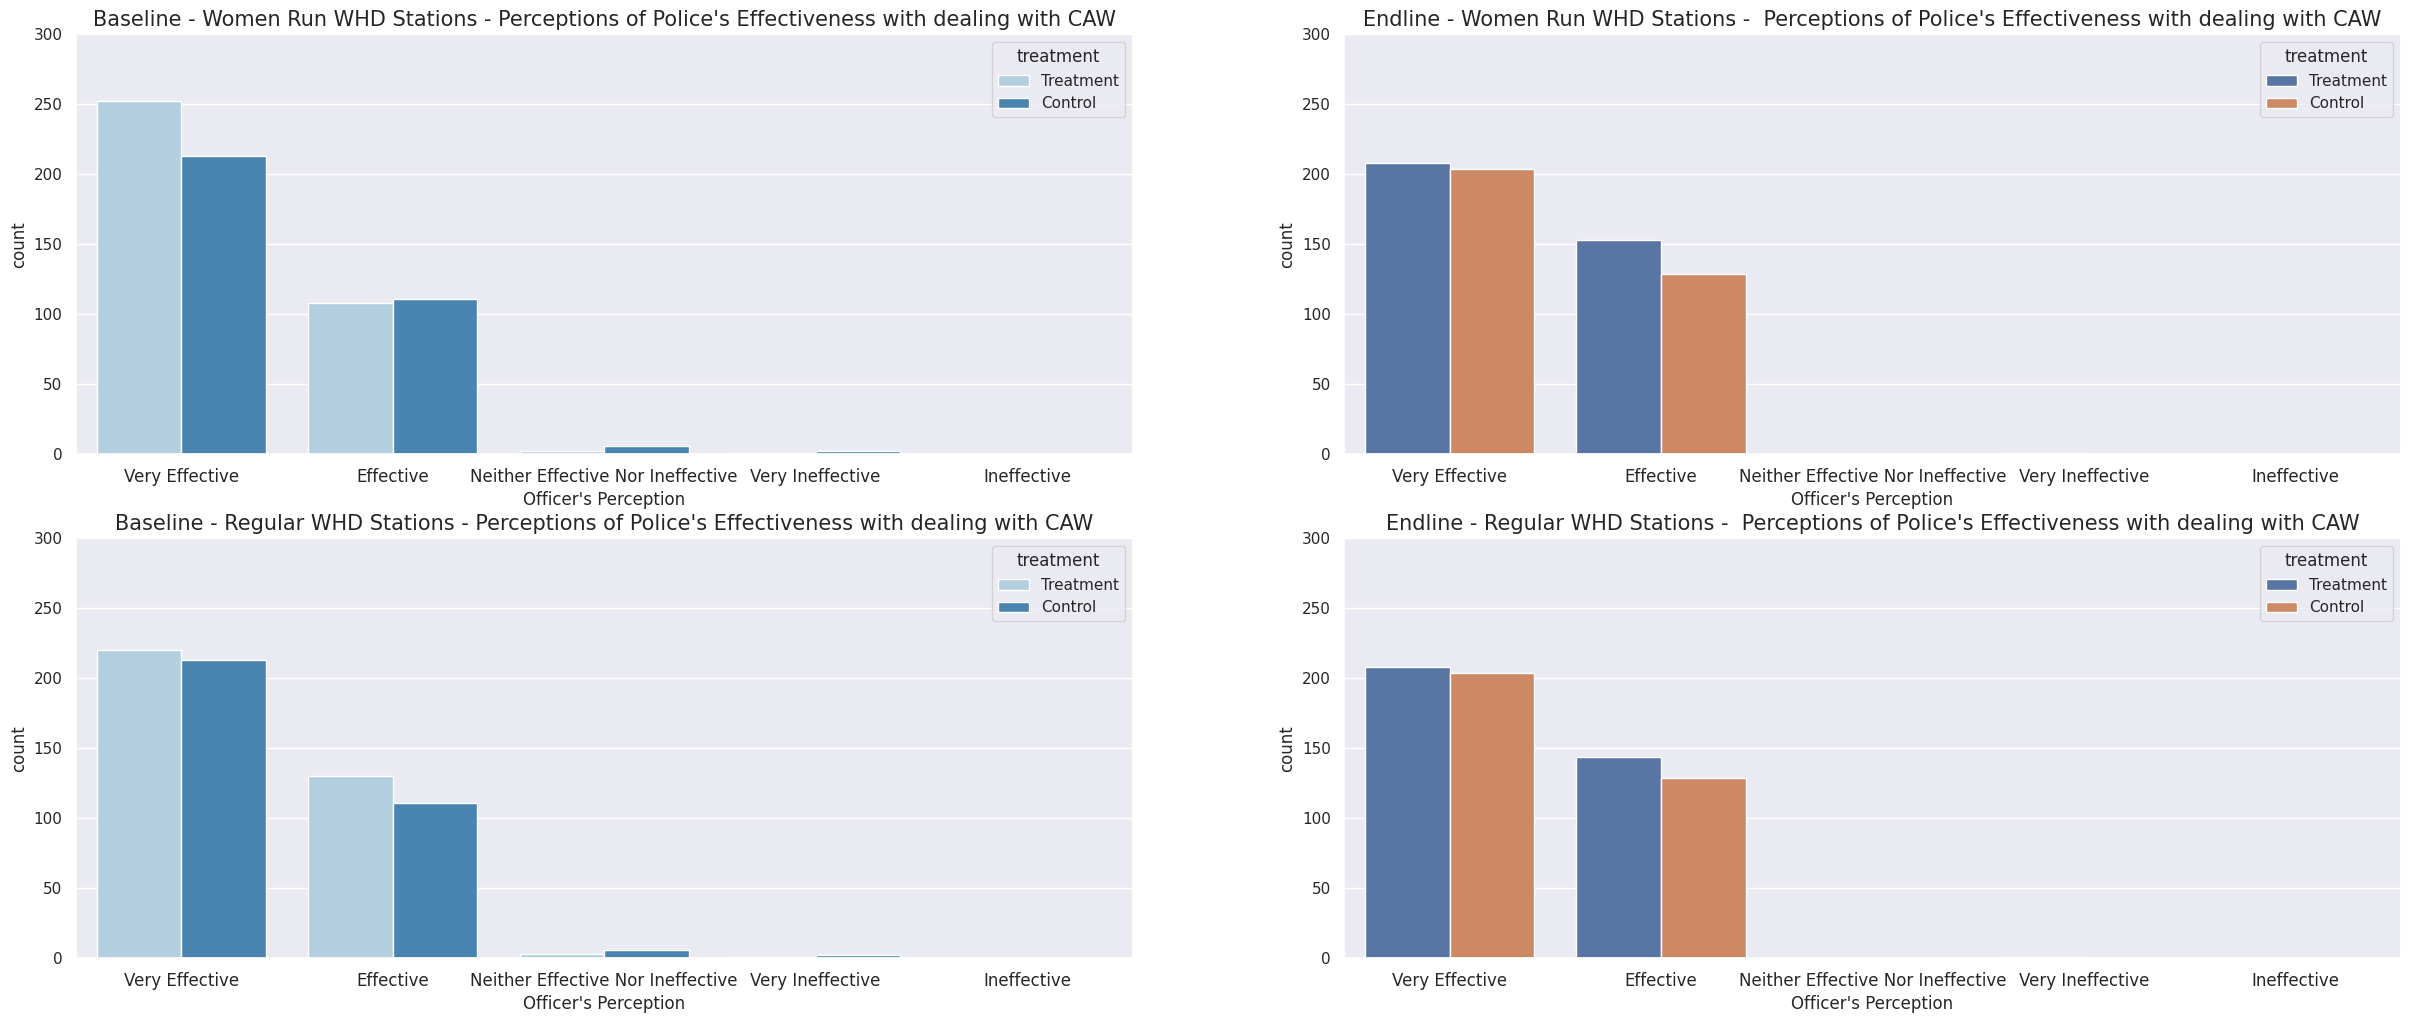

In [29]:
#Creating visuals for both treatment groups against the control group

#Setting the theme
sns.set_theme(style='darkgrid')

#setting up the grid
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(30,12))

# Flatten axes array
axes = axes.flatten()

#Creating order for categories
cat_order = ["Very Effective", "Effective", "Neither Effective Nor Ineffective", "Very Ineffective", "Ineffective"]

#Creating Order for hue
hue_ord = ["Treatment", "Control"]

# Create a count plot for Women Run WHD
_ = sns.countplot(data = whd_df, x= "b_effective", hue = "treatment", ax = axes[0], palette= "Blues", order = cat_order, hue_order = hue_ord)
_ = sns.countplot(data = whd_df, x= "e_effective", hue = "treatment", ax = axes[1], order = cat_order, hue_order = hue_ord)

# Create a count plot for regular WHD
_ = sns.countplot(data = regular_df, x= "b_effective", hue = "treatment", ax = axes[2], palette= "Blues", order = cat_order, hue_order = hue_ord)
_ = sns.countplot(data = regular_df, x= "e_effective", hue = "treatment", ax = axes[3], order = cat_order, hue_order = hue_ord)

#Setting Y axis range
for i in range(0,4):
  axes[i].set_ylim([0,300])
  axes[i].set_autoscaley_on(False)


#Setting Title
axes[0].set_title("Baseline - Women Run WHD Stations - Perceptions of Police's Effectiveness with dealing with CAW", size = 15)
axes[1].set_title("Endline - Women Run WHD Stations -  Perceptions of Police's Effectiveness with dealing with CAW", size = 15)
axes[2].set_title("Baseline - Regular WHD Stations - Perceptions of Police's Effectiveness with dealing with CAW", size = 15)
axes[3].set_title("Endline - Regular WHD Stations -  Perceptions of Police's Effectiveness with dealing with CAW", size = 15)
#setting axis labels
_ = axes[0].set_xlabel("Officer's Perception")
_ = axes[1].set_xlabel("Officer's Perception")
_ = axes[2].set_xlabel("Officer's Perception")
_ = axes[3].set_xlabel("Officer's Perception")

_ = axes[0].tick_params(axis='x', labelsize=12)
_ = axes[1].tick_params(axis='x', labelsize=12)
_ = axes[2].tick_params(axis='x', labelsize=12)
_ = axes[3].tick_params(axis='x', labelsize=12)

For the woman-run woman help desks stations versus the control group initially we saw a high amount of police respondents reporting that the police were “very effective” and “effective” in dealing with cases against women. At end-line the treatment group had a shift of about 50 respondents from “very effective” to “effective”.  The control group during this same time had a distribution that more or less stayed the same. This shows that the first treatment arm showed some sort of awareness of inequities or effectiveness in dealing with cases against women.

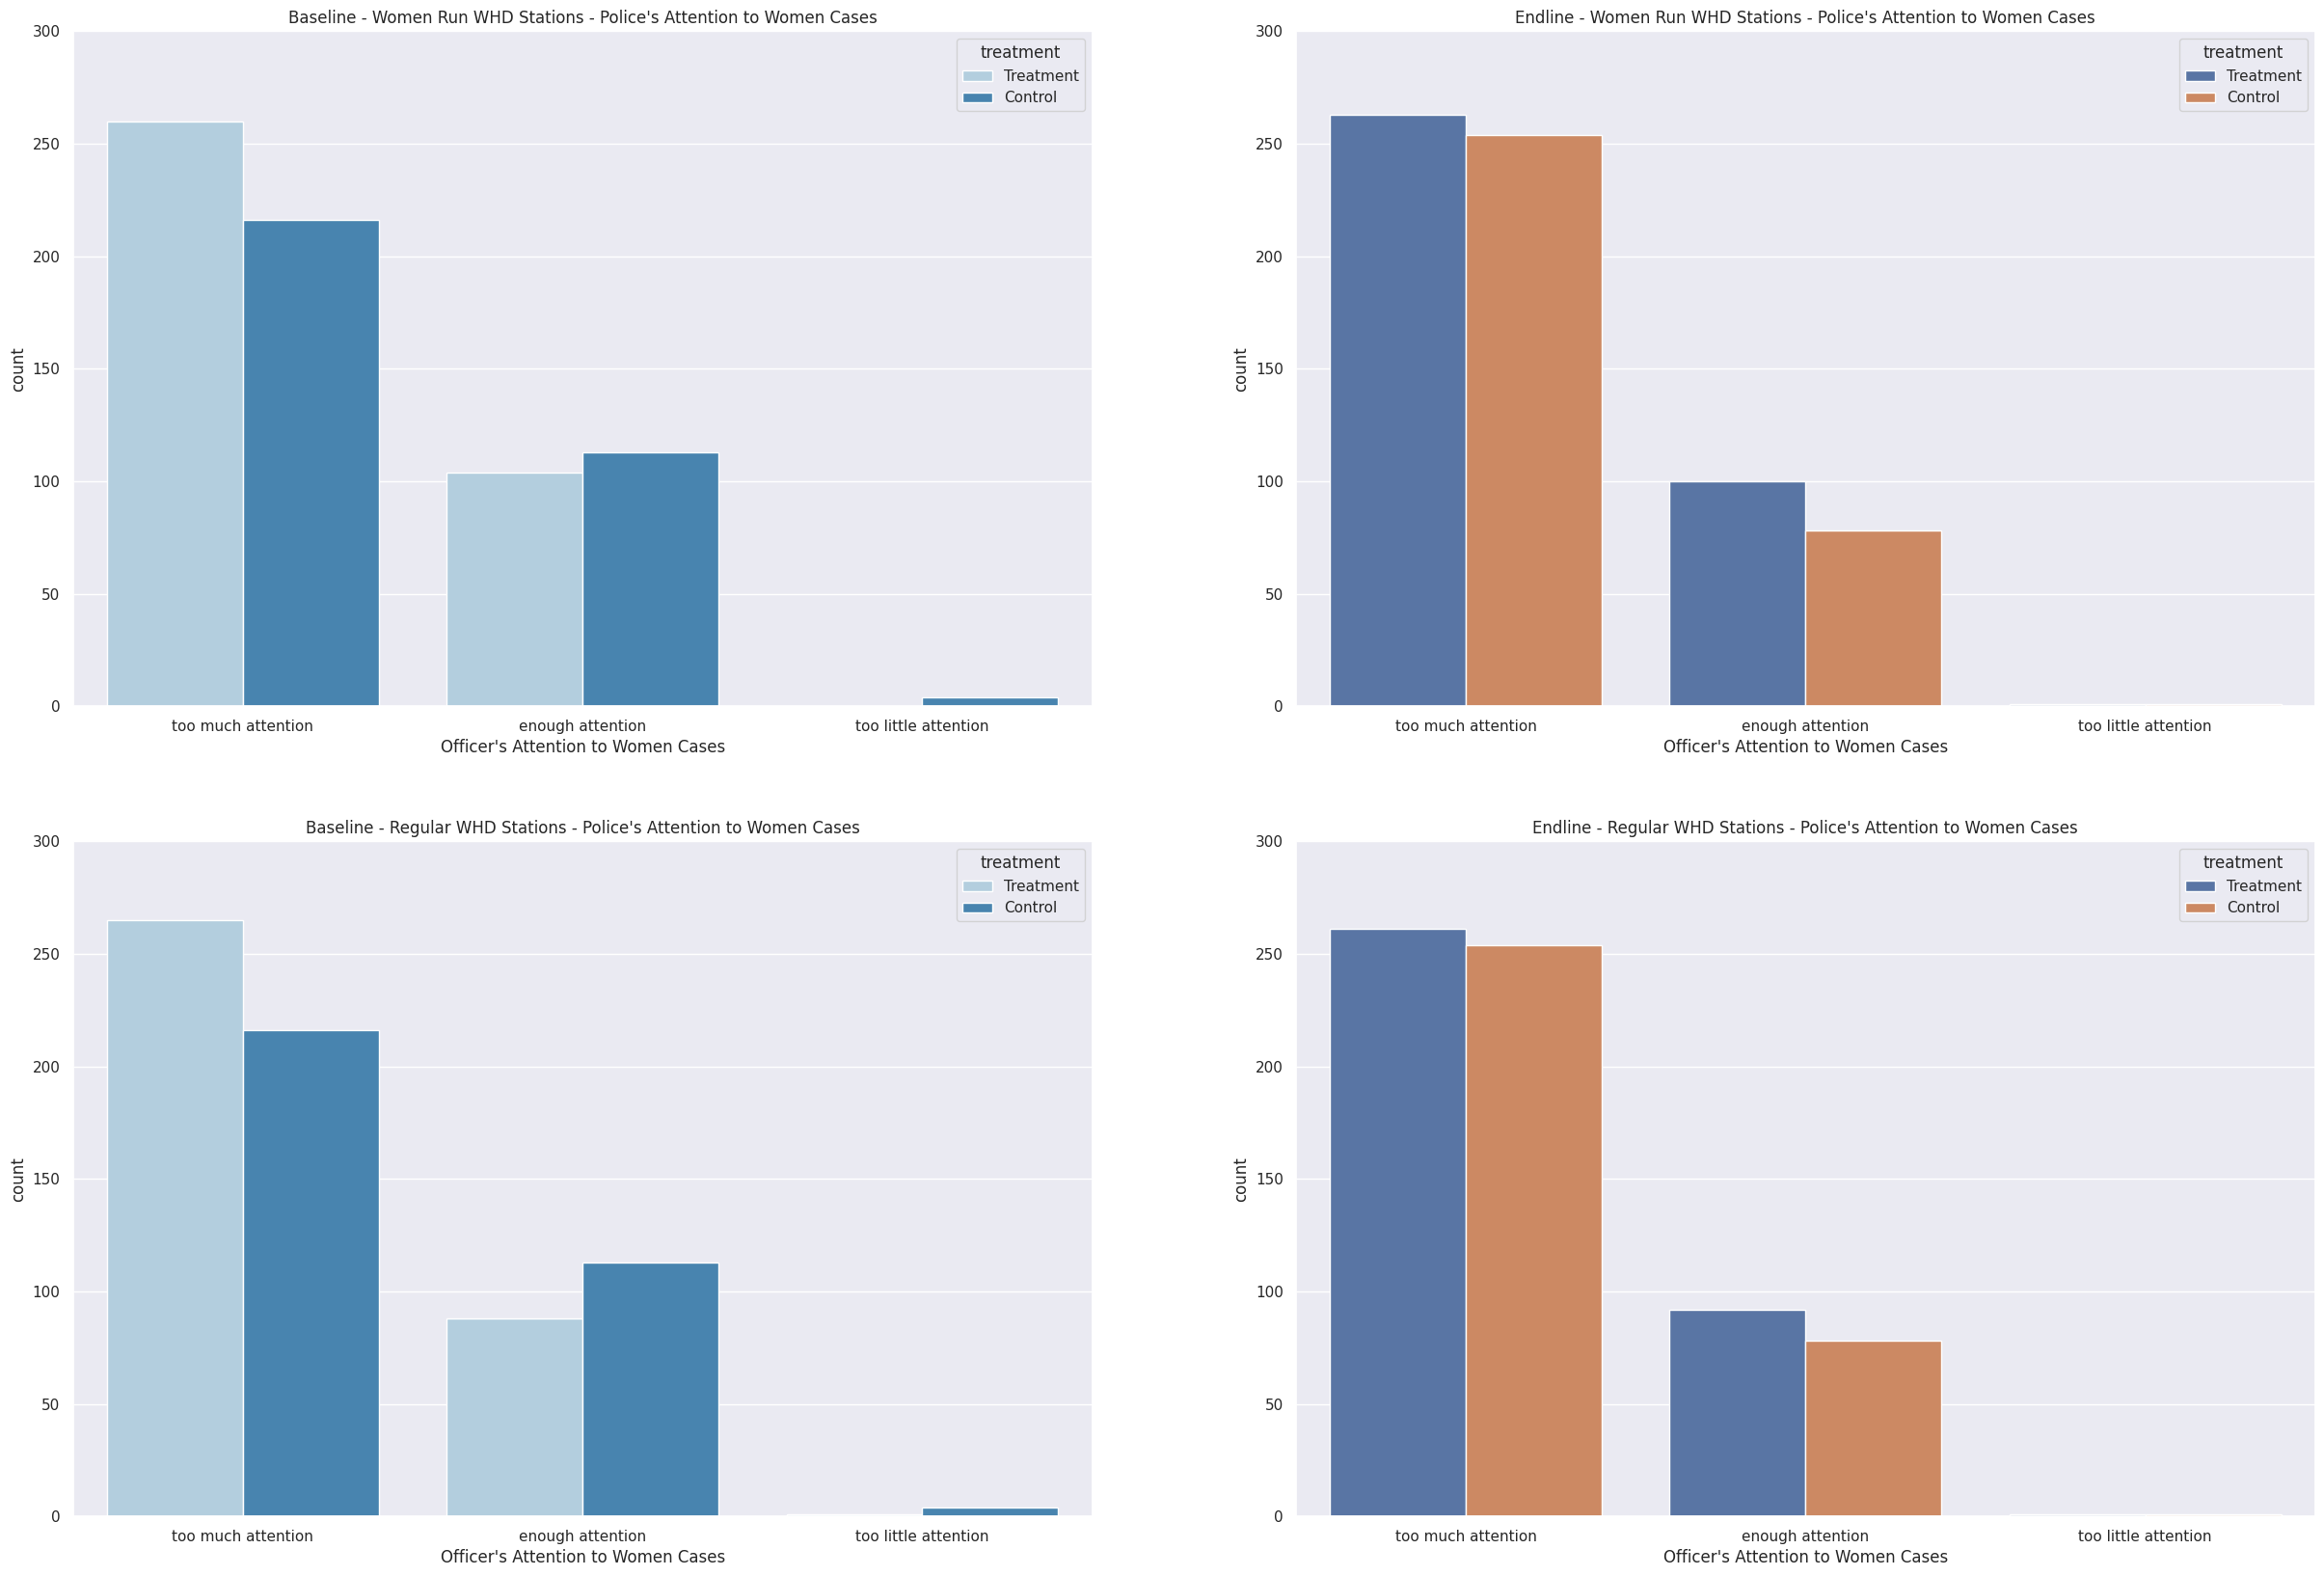

In [40]:
#Creating visuals for both treatment groups against the control group

#Setting the theme
sns.set_theme(style='darkgrid')

#setting up the grid
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(30,20))

#flatten the axis
axes = axes.flatten()

#creating order for categories
cat_order = ["too much attention","enough attention", "too little attention"]

#Creating Order for hue
hue_ord = ["Treatment", "Control"]

# Create a count plot for Women Run
_ = sns.countplot(data = whd_df, x= "b_wcase", hue = "treatment", ax = axes[0], palette= "Blues", order = cat_order, hue_order = hue_ord)
_ = sns.countplot(data = whd_df, x= "e_wcase", hue = "treatment", ax = axes[1], hue_order= hue_ord)
_ = sns.countplot(data = regular_df, x= "b_wcase", hue = "treatment", ax = axes[2], palette= "Blues", order = cat_order, hue_order = hue_ord)
_ = sns.countplot(data = regular_df, x= "e_wcase", hue = "treatment", ax = axes[3], order = cat_order, hue_order= hue_ord)

#Setting Title
axes[0].set_title("Baseline - Women Run WHD Stations - Police's Attention to Women Cases")
axes[1].set_title("Endline - Women Run WHD Stations - Police's Attention to Women Cases")
axes[2].set_title("Baseline - Regular WHD Stations - Police's Attention to Women Cases")
axes[3].set_title("Endline - Regular WHD Stations - Police's Attention to Women Cases")

#Setting Y axis range
for i in range(0,4):
  axes[i].set_ylim([0,300])
  axes[i].set_autoscaley_on(False)

#setting axis labels
_ = axes[0].set_xlabel("Officer's Attention to Women Cases")
_ = axes[1].set_xlabel("Officer's Attention to Women Cases")
_ = axes[2].set_xlabel("Officer's Attention to Women Cases")
_ = axes[3].set_xlabel("Officer's Attention to Women Cases")

In [41]:
#Creating two seperate treatment dataframes for means

numerical_columns = ["e_sensitivity", "b_sensitivity","e_wcase_encoded","b_wcase_encoded","e_effective_encoded","b_effective_encoded"]
Reg_stats_df = regular_df.groupby("treatment")[numerical_columns].mean()
W_stats_df = whd_df.groupby("treatment")[numerical_columns].mean()

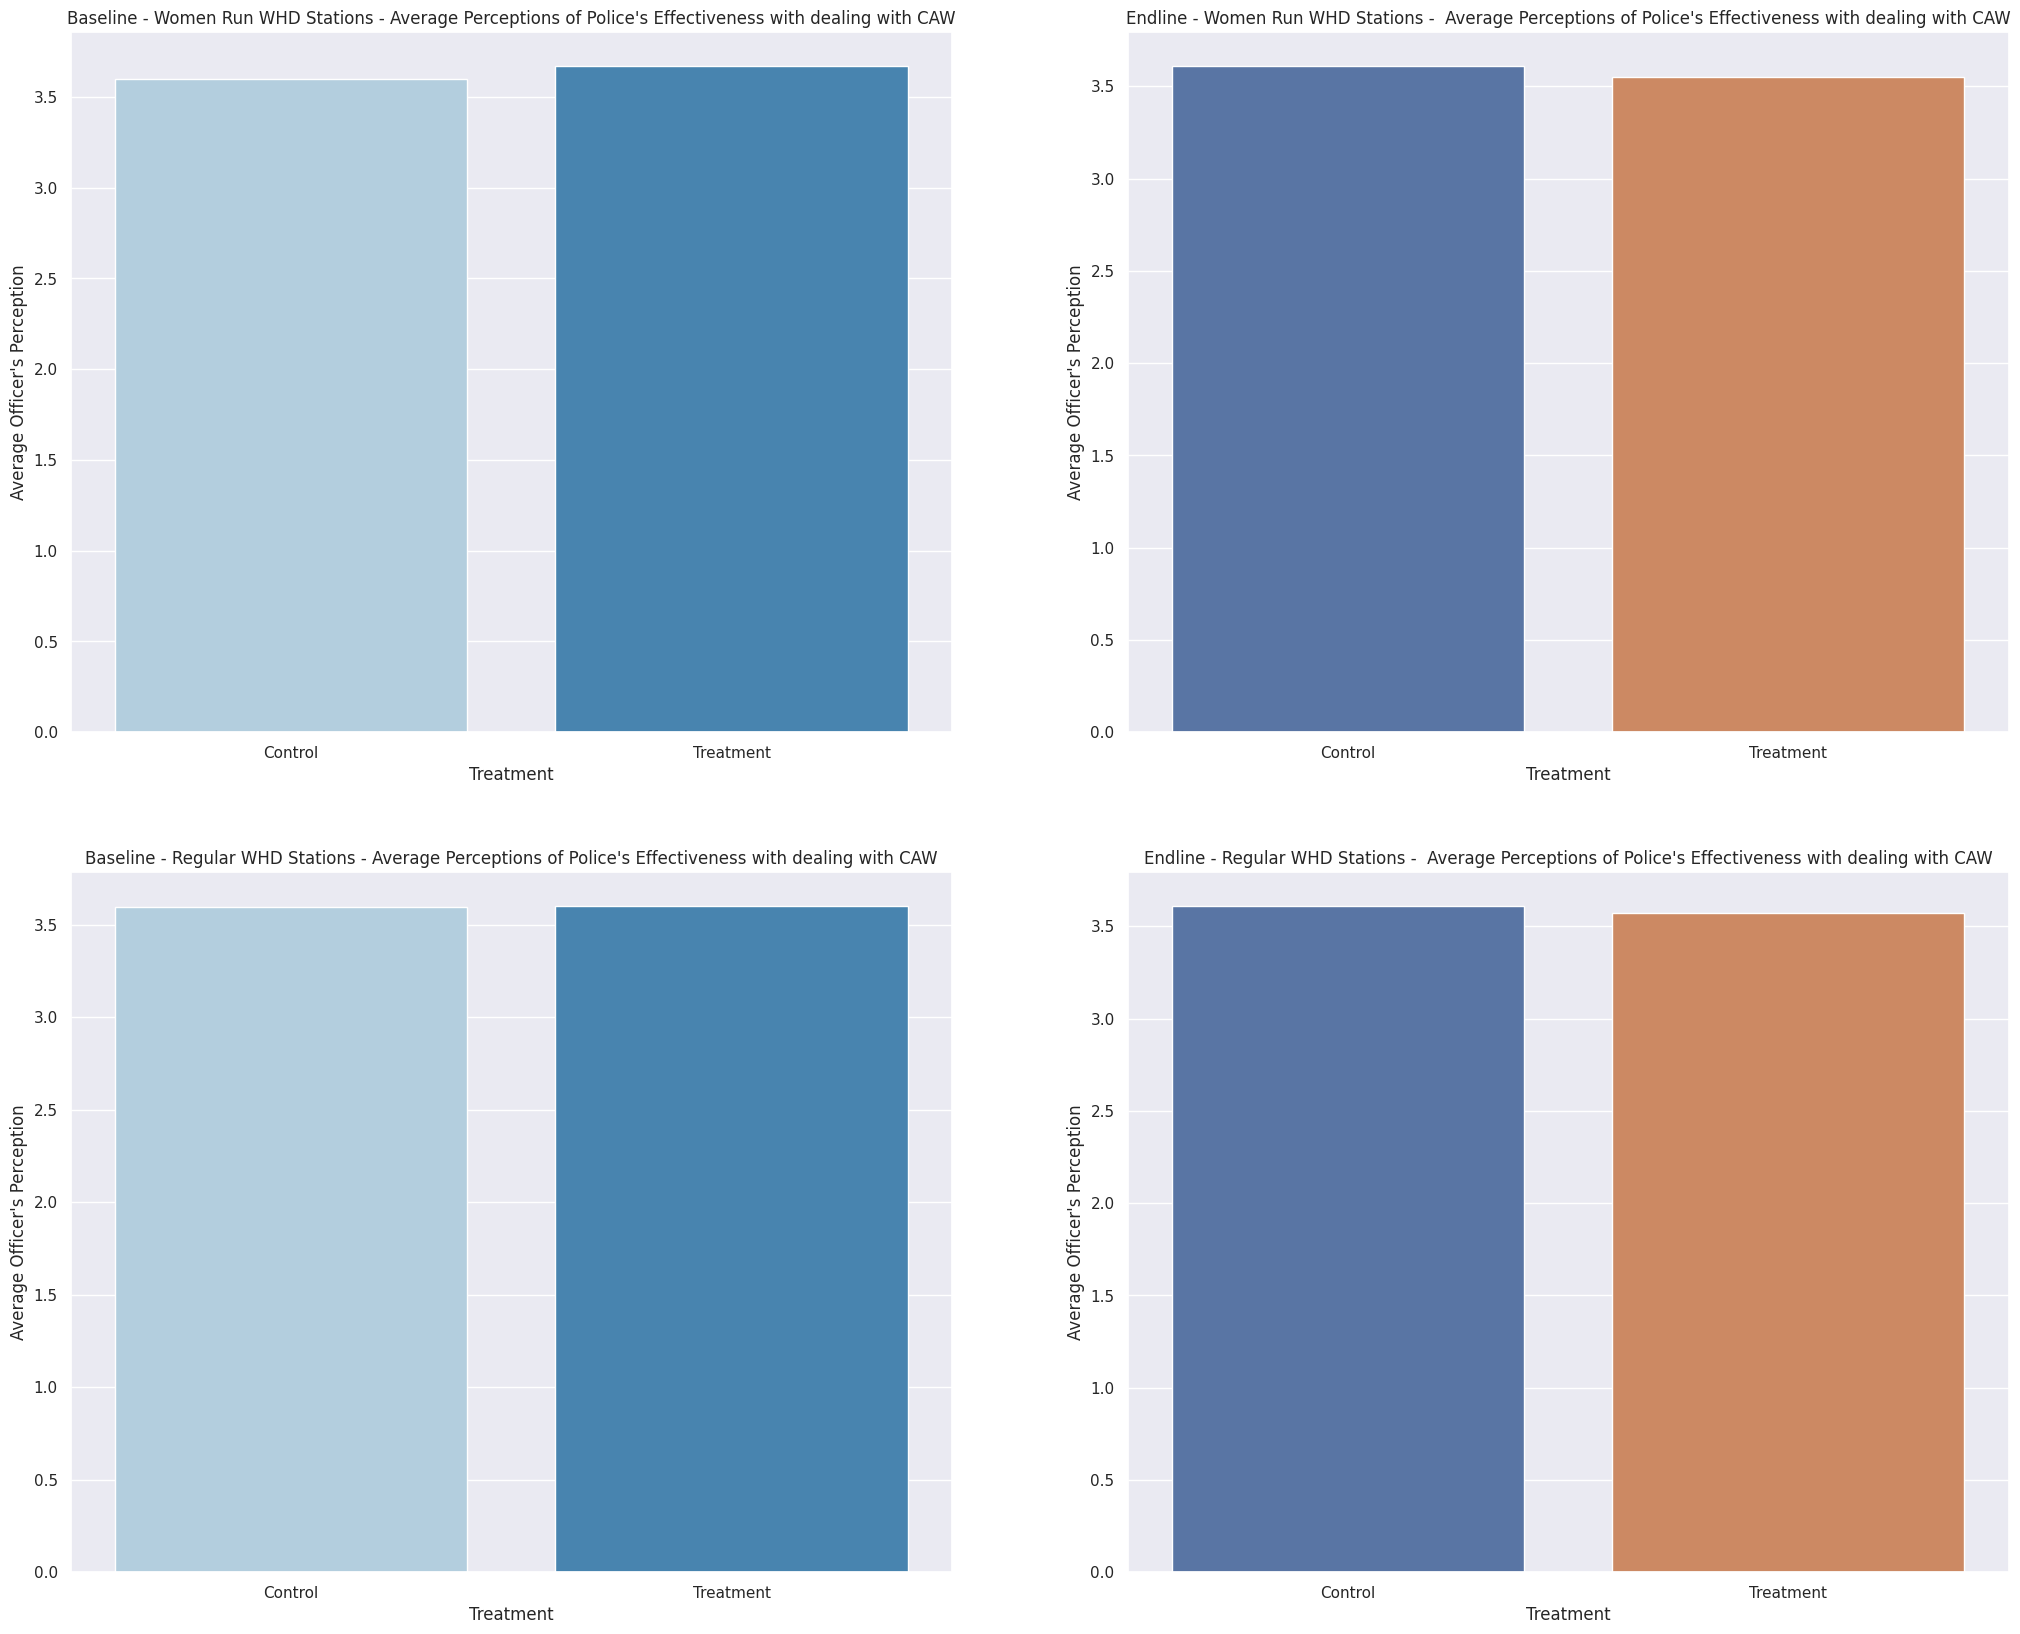

In [42]:
#Creating visuals for both treatment groups against the control group

#Setting the theme
sns.set_theme(style='darkgrid')

#setting up the grid
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(25,20))

# Flatten axes array
axes = axes.flatten()

# Create a bar plot for Women Run
_ = sns.barplot(data = W_stats_df, x = W_stats_df.index , y = "b_effective_encoded", hue = W_stats_df.index, ax = axes[0], palette= "Blues")
_ = sns.barplot(data = W_stats_df, x = W_stats_df.index , y = "e_effective_encoded", hue = W_stats_df.index, ax = axes[1] )

#Create a bar plot for regualr police stations
_ = sns.barplot(data = Reg_stats_df, x = W_stats_df.index , y = "b_effective_encoded", hue = W_stats_df.index, ax = axes[2], palette= "Blues")
_ = sns.barplot(data = Reg_stats_df, x = W_stats_df.index , y = "e_effective_encoded", hue = W_stats_df.index, ax = axes[3] )

#Setting Title
axes[0].set_title("Baseline - Women Run WHD Stations - Average Perceptions of Police's Effectiveness with dealing with CAW")
axes[1].set_title("Endline - Women Run WHD Stations -  Average Perceptions of Police's Effectiveness with dealing with CAW")
axes[2].set_title("Baseline - Regular WHD Stations - Average Perceptions of Police's Effectiveness with dealing with CAW")
axes[3].set_title("Endline - Regular WHD Stations -  Average Perceptions of Police's Effectiveness with dealing with CAW")
#setting axis labels
_ = axes[0].set_xlabel("Treatment")
_ = axes[1].set_xlabel("Treatment")
_ = axes[2].set_xlabel("Treatment")
_ = axes[3].set_xlabel("Treatment")

#Setting y variables
_ = axes[0].set_ylabel("Average Officer's Perception")
_ = axes[1].set_ylabel("Average Officer's Perception")
_ = axes[2].set_ylabel("Average Officer's Perception")
_ = axes[3].set_ylabel("Average Officer's Perception")

In my next visual, I converted the ordinal variable values into encoded values. Therefore, “too little attention” would be assigned a value of 0 whereas “too much attention” would have a value of 2. Looking at the baseline averages we can see that the control group had a slightly less officer perception of police effectiveness in dealing with cases against women. At end-line, the control group stayed relatively the same, however, the treatment group had a slight decline in the average officer's perception of dealing with cases against women. This is in line with our initially finding,  showing that there is some sort of awareness that the police are not as effective in dealing with cases against women.